In [25]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Read in the CSV

In [26]:
import pandas as pd
SOURCE = '../notebooks/kc_house_data.csv'
df = pd.read_csv(SOURCE)

### Data Exploration

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
df.describe(exclude='number')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [30]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

### Train/Test Split

In [31]:
from sklearn.model_selection import train_test_split
# Train/Test split
traintest = df.copy()
id = df['id'].unique()
train_id, test_id = train_test_split(id, random_state=42, test_size=.1)

train = traintest[traintest['id'].isin(train_id)]
test = traintest[traintest['id'].isin(test_id)]
train.shape, test.shape

((19449, 21), (2164, 21))

### Wrangle Function- Feature dropping

In [32]:
# Wrangle function
def wrangle(X):
    X = X.copy()
    

    X = X.drop(columns =['date', 'view', 'lat', 'long', 'yr_renovated', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot','sqft_lot15', 'zipcode'])
    
    return X
train = wrangle(train)
test = wrangle(test)




### Matrix/Vectorizing of train & test

In [33]:
import numpy as np

target = 'price'
X_train = train.drop(columns = [target,'id'])
y_train = train[target]
X_test = test.drop(columns=[target, 'id'])
y_test = test[target]

# Log transformation of target vector
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

### Visualizations of y_train & y_train_log

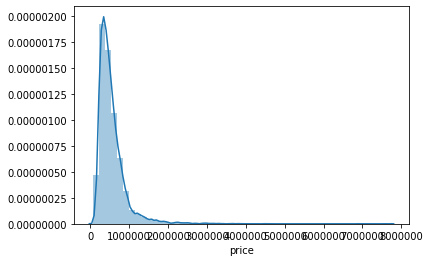

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_train)

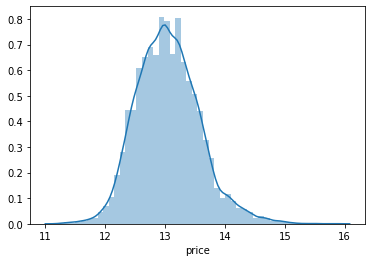

In [35]:
sns.distplot(y_train_log)

### XGBRegressor with early stopping rounds to determine best value for n_estimators

In [36]:
trainval = train.copy()
train, val = train_test_split(trainval)
X_train = train.drop(columns=[target, 'id'])
y_train = train[target]
y_train_log = np.log1p(y_train)
X_val = val.drop(columns=[target, 'id'])
y_val = val[target]
y_val_log = np.log1p(y_val)

In [37]:
# XGBRegressor wih early stopping rounds
import warnings
import category_encoders as ce
from xgboost import XGBRegressor
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=10)

[14:34:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.3036	validation_1-rmse:11.3146
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:10.1749	validation_1-rmse:10.1855
[2]	validation_0-rmse:9.15925	validation_1-rmse:9.16914
[3]	validation_0-rmse:8.24522	validation_1-rmse:8.25422
[4]	validation_0-rmse:7.42269	validation_1-rmse:7.43078
[5]	validation_0-rmse:6.68249	validation_1-rmse:6.69056
[6]	validation_0-rmse:6.01647	validation_1-rmse:6.02422
[7]	validation_0-rmse:5.41716	validation_1-rmse:5.42485
[8]	validation_0-rmse:4.87792	validation_1-rmse:4.88573
[9]	validation_0-rmse:4.3928	validation_1-rmse:4.40059
[10]	validation_0-rmse:3.95636	validation_1-rmse:3.96399
[11]	validation_0-rmse:3.56387	validation_1-rmse:3.57142
[12]	validation_0-rmse:3.21087	validation_1-rmse:3.2

[135]	validation_0-rmse:0.295441	validation_1-rmse:0.301934
[136]	validation_0-rmse:0.295409	validation_1-rmse:0.301926
[137]	validation_0-rmse:0.295392	validation_1-rmse:0.301922
[138]	validation_0-rmse:0.295343	validation_1-rmse:0.301931
[139]	validation_0-rmse:0.29533	validation_1-rmse:0.30193
[140]	validation_0-rmse:0.295261	validation_1-rmse:0.301875
[141]	validation_0-rmse:0.295204	validation_1-rmse:0.301861
[142]	validation_0-rmse:0.29516	validation_1-rmse:0.301844
[143]	validation_0-rmse:0.295076	validation_1-rmse:0.301803
[144]	validation_0-rmse:0.295002	validation_1-rmse:0.301772
[145]	validation_0-rmse:0.294958	validation_1-rmse:0.301746
[146]	validation_0-rmse:0.294868	validation_1-rmse:0.301656
[147]	validation_0-rmse:0.294859	validation_1-rmse:0.301676
[148]	validation_0-rmse:0.294828	validation_1-rmse:0.301708
[149]	validation_0-rmse:0.294785	validation_1-rmse:0.301713
[150]	validation_0-rmse:0.294726	validation_1-rmse:0.301698
[151]	validation_0-rmse:0.294717	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Permutation Importance

In [38]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train_encoded, y_train_log)
feature_names = X_train_encoded.columns.tolist()
show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1394 ± 0.0008,grade
0.0782 ± 0.0005,sqft_living
0.0650 ± 0.0011,yr_built
0.0078 ± 0.0005,bathrooms
0.0041 ± 0.0002,waterfront
0.0025 ± 0.0002,condition
0.0024 ± 0.0001,bedrooms
0.0013 ± 0.0000,floors


In [39]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Create and fit pipeline

In [40]:

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(ce.OrdinalEncoder(),
            XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=645,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
)
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
print('y_val RMSLE', rmse(y_val_log, y_pred_log))



[14:34:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
y_val RMSLE 0.3025916182712615


### Cross validation scores

In [41]:
# Cross Validation Train set 5 folds
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, mean_squared_error




k=5
groups = train['id']
scores = cross_val_score(pipeline, X_train, y_train_log, cv=k, n_jobs=-1,
                        scoring='neg_mean_squared_error', groups=groups)
print(f'RMSLE for {k} folds:', np.sqrt(-scores))

RMSLE for 5 folds: [0.3082567  0.29526456 0.30162306 0.29624759 0.31036676]


### Plotting feature importances

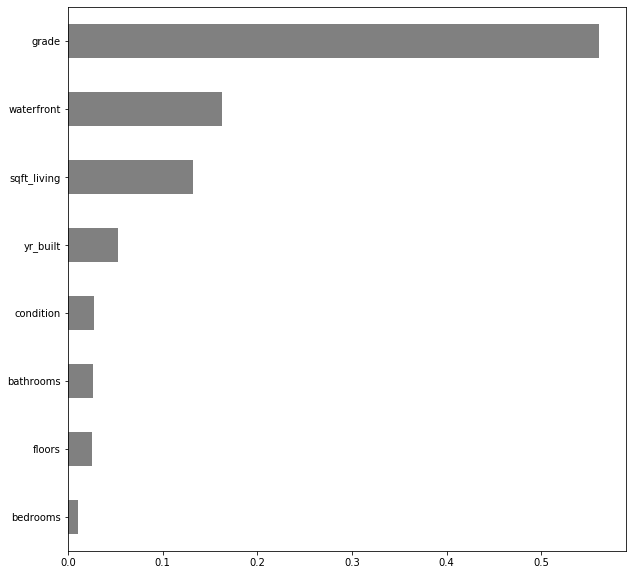

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['xgbregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

In [49]:
# Get the test error (one time, at the end)
y_pred_log = pipeline.predict(X_test)
y_pred=np.expm1(y_pred_log)
print('RMSLE', rmse(y_test_log, y_pred_log))
print('dollars:', rmse(y_test, y_pred))

RMSLE 0.30304918125277425
dollars: 187221.58641692193


In [44]:
from sklearn.metrics import explained_variance_score
print('Var Score:', explained_variance_score(y_pred,y_test))

0.5775857044439964


In [45]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [46]:
def predict(beds,baths,sqft,floor, water, cond, grade, yr):
    df = pd.DataFrame(
        columns=['bedrooms', 'bathrooms','sqft_living','floors', 'waterfront', 'condition', 'grade', 'yr_built'],
        data=[[ beds, baths, sqft, floor, water, cond, grade, yr]]
    )
    y_pred_log=pipeline.predict(df)[0]
    y_pred = np.expm1(y_pred_log)

    return y_pred

predict(3, 3, 1972, 1, 1, 4, 7, 1956)

508749.16